## Outline

1. Data preparation (loading, cleaning, splitting, standardising, sampling)
3. Simple binary classificator
    1. K-Nearest Neighbours (K-NN)
    2. Logistic regression
    3. Boosting
    4. Support Vector machines (SVM)
    5. Decision Trees
    6. Random Forest

In [32]:
# Connect with Kaggle API


# Dataset: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

"""import kaggle
kaggle.api.authenticate()

kaggle.api.dataset_download_files('mssmartypants/water-quality', path='.', unzip=True)"""


"import kaggle\nkaggle.api.authenticate()\n\nkaggle.api.dataset_download_files('mssmartypants/water-quality', path='.', unzip=True)"

### Data Preparation

In [33]:
import pandas as pd

# Dataset From: mssmartypants/water-quality

# Load the data
data = pd.read_csv('data/water/waterQuality1.csv')

# Display header
print(f'Header of the dataset {data.head()} \n')

Header of the dataset    aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  s

In [34]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [35]:
# Change ammonia and is_safe from object to float

data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [36]:
# Check for missing values
print(f'Check for the presence of null data: {data.isnull().sum()}')

# Check for output proportions
print(data['is_safe'].value_counts())

Check for the presence of null data: aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64
is_safe
0.0    7084
1.0     912
Name: count, dtype: int64


In [37]:
data = data.dropna()
data = data.drop(data[data['is_safe'] == '#NUM!'].index)
data = data.drop(data[data['ammonia'] == '#NUM!'].index)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [38]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [39]:
from sklearn.model_selection import train_test_split

X = data.drop('is_safe', axis=1)
y = data['is_safe']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=30)

print(f'Number of samples in training set: {X_train.shape[0]}')
print(f'Number of samples in validation set: {X_val.shape[0]}')


Number of samples in training set: 7196
Number of samples in validation set: 800


In [40]:
import matplotlib.pyplot as plt


datasets = {'Train': X_train, 'Validation': X_val}

plt.figure(figsize=(15, 8))
for idx, (dataset_name, dataset) in enumerate(datasets.items(), 1):
    plt.subplot(1, 2, idx)  
    dataset.boxplot()  
    plt.title(f'Boxplot of Features in {dataset_name} Dataset')
    plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

KeyboardInterrupt: 

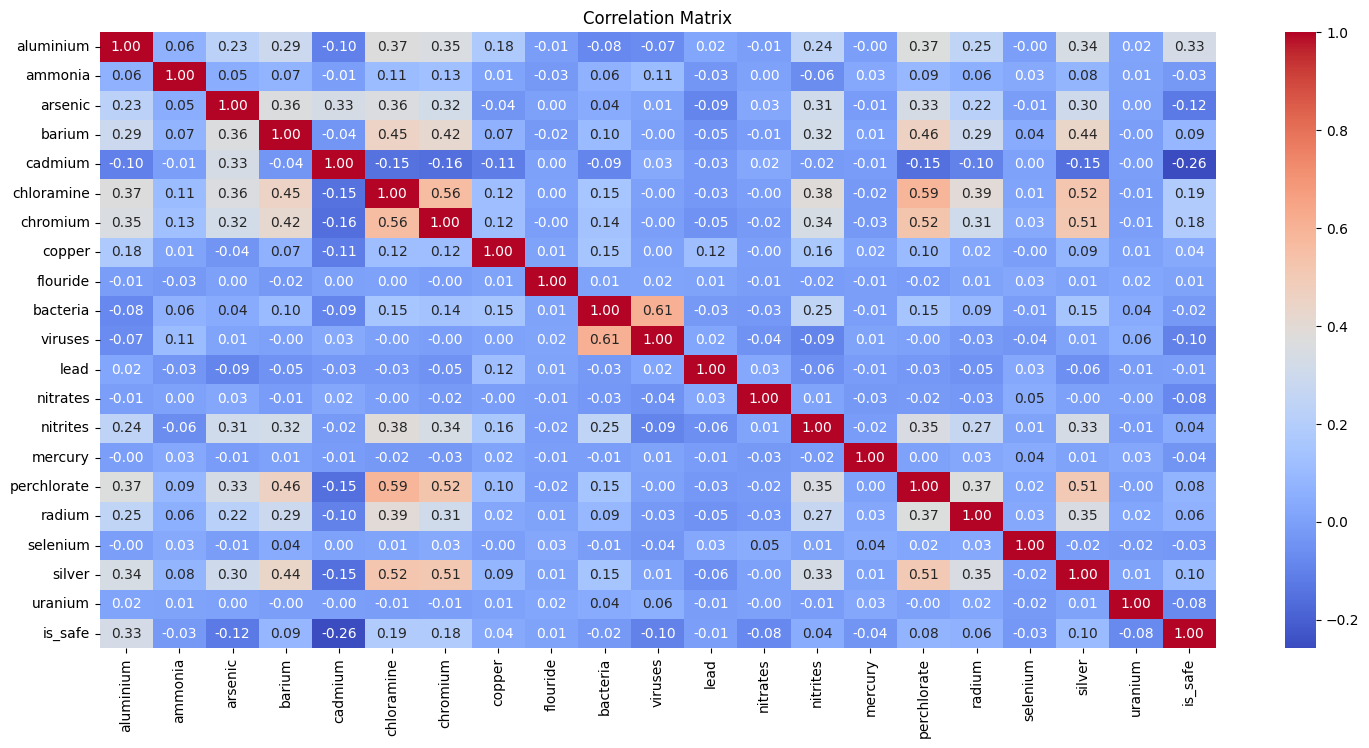

In [ ]:
# Correlation matrix of the features

import seaborn as sns # sns --> another data visualisation library based on matplotlib

dataset = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(18, 8))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

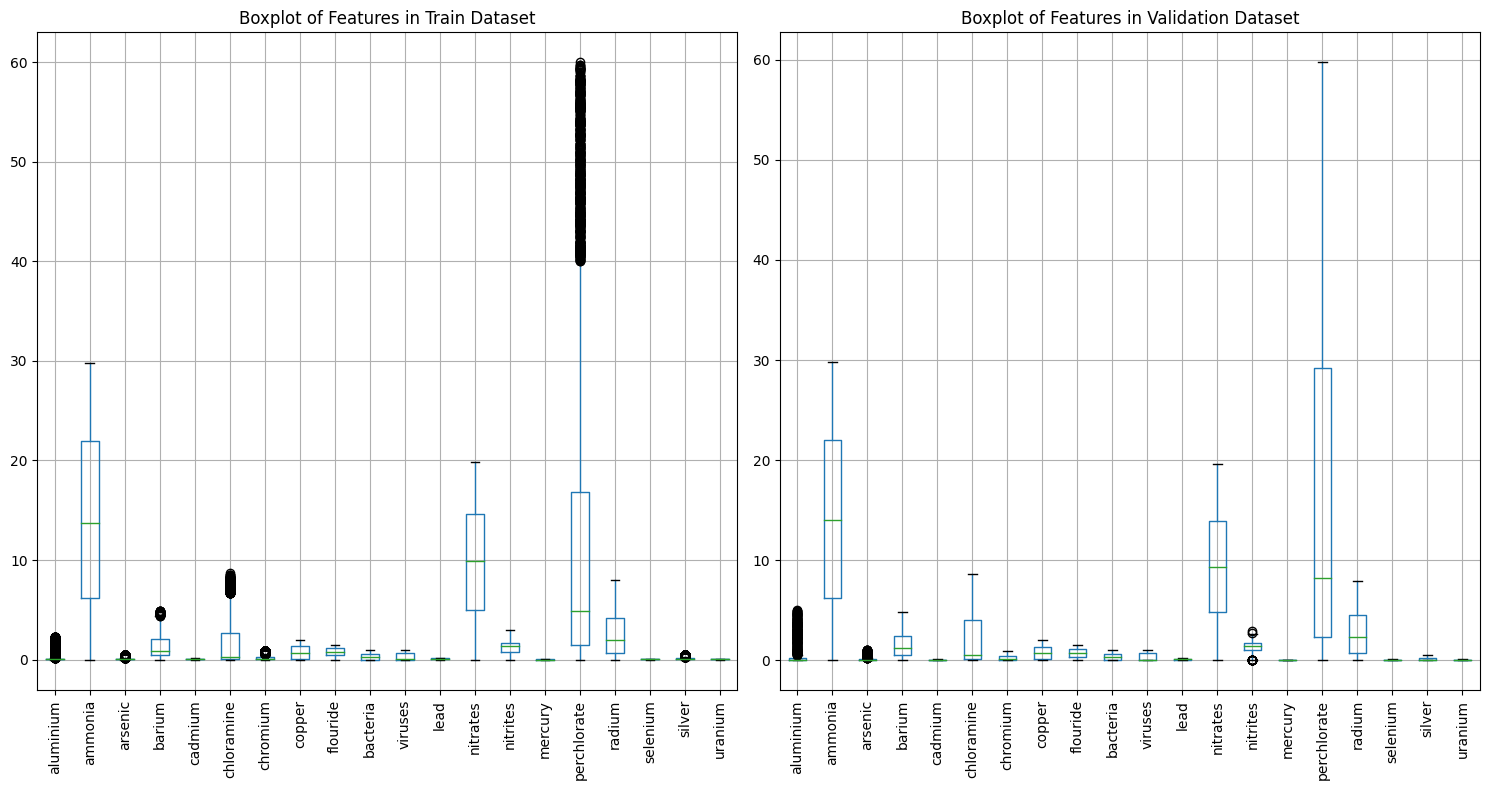

In [ ]:
# Remove outliers from the training and test sets
from scipy import stats
import numpy as np

def remove_outliers(data, output, method = 'iqr'):
    columns = ['aluminium', 'arsenic']
    if method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.80)
        IQR = Q3 - Q1

        for column in columns:
            mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
            data = data[mask]
            output = output[mask]
    
    if method == 'zscore':
        z = np.abs(stats.zscore(data))
        data = data[(z < 2.4).all(axis=1)]
    
    return data, output

X_train_clean, y_train_clean = remove_outliers(X_train, y_train, 'iqr')

datasets = {'Train': X_train_clean, 'Validation': X_val}
# Display the boxplot of the training, test and validation sets
plt.figure(figsize=(15, 8))

for idx, (dataset_name, dataset) in enumerate(datasets.items(), 1):
    plt.subplot(1, 2, idx)  
    dataset.boxplot()  
    plt.title(f'Boxplot of Features in {dataset_name} Dataset')
    plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


In [ ]:
print(f'Number of samples in training set: {X_train_clean.shape[0]}')

Number of samples in training set: 5550


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train_clean = scaler.fit_transform(X_train_clean) # scaled also the cleaned training set -> not used in the model

print(f'The length of the training dataset is: {len(X_train)}')
print(f'The length of the validation dataset is: {len(X_val)}')

The length of the training dataset is: 7196
The length of the validation dataset is: 800


### Oversampling

- SMOTE (**Synthetic Minority Oversampling Technique**): selects examples close in the feature space. HOW:
    1. select a minory class instance &rarr; **A**
    2. finds A k-minority class instance
    3. choose one of the k-neighbour at random &rarr; **B**
    4. syntetic instance is created by a convex combination of **A** and **B** &rarr; **C**

### Undersampling

- Random Under Sampler: randomly eliminates observation of the majority class 
- NearMiss: removes the instances of the majority class close to the minory one. HOW:
    1. find dinstances between the all the instances of the minority class and the majority
    2. select **N** majority nstances that have the closest distance with the minority calss
    3. given **k** the number of minority instances, **k*N** instances of the mnajority class are returned

In [ ]:
## Oversampling the minority class using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=30)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

X_train_clean_sm, y_train_clean_sm = smote.fit_resample(X_train_clean, y_train_clean)

# Check for the output proportions after SMOTE
print(f'Enlarged dataset proportion {y_train_sm.value_counts()}')

Enlarged dataset proportion is_safe
0.0    6383
1.0    6383
Name: count, dtype: int64


In [ ]:
# Undersample the data so to have the same proportion of is_safe 
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=30)
undersampler = NearMiss(sampling_strategy='majority', version=2)

X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)
X_train_clean_us, y_train_clean_us = smote.fit_resample(X_train_clean, y_train_clean)

print(f'Enlarged dataset proportion {y_train_us.value_counts()}')

Enlarged dataset proportion is_safe
0.0    813
1.0    813
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    plt.figure(figsize=(4, 2))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

### K-NN

Accuracy on dataset as it is: 0.868
Accuracy on dataset without outliers: 0.691
Accuracy on undersampled dataset: 0.229
Acuracy on oversampled dataset: 0.715


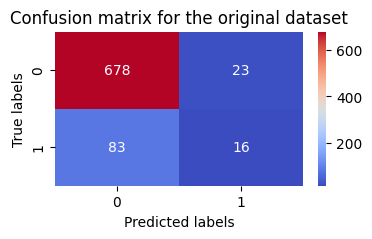

In [ ]:
# Try standard K-NN
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_clean = KNeighborsClassifier(n_neighbors=5)
knn_clean.fit(X_train_clean_us, y_train_clean_us)

knn_us = KNeighborsClassifier(n_neighbors=5)
knn_us.fit(X_train_us, y_train_us)

knn_sm = KNeighborsClassifier(n_neighbors=5)
knn_sm.fit(X_train_sm, y_train_sm)


# Display the classification report
print(f'Accuracy on dataset as it is: {accuracy_score(y_val, knn.predict(X_val)):.3f}')
print(f'Accuracy on dataset without outliers: {accuracy_score(y_val, knn_clean.predict(X_val)):.3f}')
print(f'Accuracy on undersampled dataset: {accuracy_score(y_val, knn_us.predict(X_val)):.3f}')
print(f'Acuracy on oversampled dataset: {accuracy_score(y_val, knn_sm.predict(X_val)):.3f}')


# Plot the confusion matrix
plot_confusion_matrix(y_val, knn.predict(X_val), 'Confusion matrix for the original dataset')


Accuracy score of knn 0.69


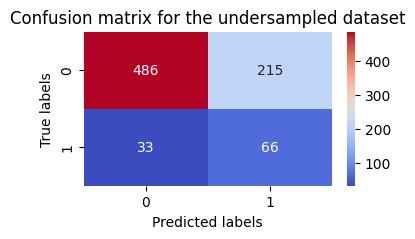

In [ ]:
# Try to tune the hyperparameters of the K-NN model

knns = KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='uniform') # euclidean, manhattan, minkowski, cosine

knns.fit(X_train_clean_us, y_train_clean_us)

# Display the classification report
print(f'Accuracy score of knn {accuracy_score(y_val, knns.predict(X_val))}')

plot_confusion_matrix(y_val, knns.predict(X_val), 'Confusion matrix for the undersampled dataset')


### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=30, max_iter=10000)
log_reg.fit(X_train, y_train)

log_reg_us = LogisticRegression(random_state=30, max_iter=10000)
log_reg_us.fit(X_train_us, y_train_us)

log_reg_clean = LogisticRegression(random_state=30)
log_reg_clean.fit(X_train_clean_us, y_train_clean_us)

log_reg_sm = LogisticRegression(random_state=30, max_iter=10000)
log_reg_sm.fit(X_train_sm, y_train_sm)

print(f'Accuracy on validation set by standard dataset \n { accuracy_score(y_val, log_reg.predict(X_val)):.3f} \n')
print(f'Accuracy on validation set by cleaned dataset \n { accuracy_score(y_val, log_reg_clean.predict(X_val)):.3f} \n')
print(f'Accuracy on validation set by undersampled dataset \n { accuracy_score(y_val, log_reg_us.predict(X_val)):.3f} \n')
print(f'Accuracy on validation set by oversampled dataset \n { accuracy_score(y_val, log_reg_sm.predict(X_val)):.3f} \n')b

/home/fabiotdt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on validation set by standard dataset 
 0.899 

Accuracy on validation set by cleaned dataset 
 0.745 

Accuracy on validation set by undersampled dataset 
 0.414 

Accuracy on validation set by oversampled dataset 
 0.807 



In [ ]:
print(y_val.iloc(0))

In [ ]:
y = y_val
y_pred = log_reg.predict(X_val)

print(f'predicted {y_pred}, real one {y}')

predicted [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

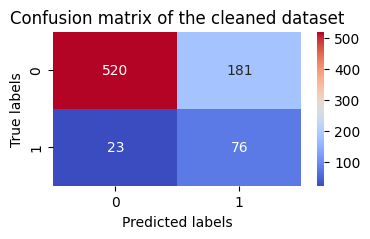

In [ ]:
# Plot the confusion matrix to see the performance of the model
plot_confusion_matrix(y_val, log_reg_clean.predict(X_val), 'Confusion matrix of the cleaned dataset')

Accuracy on validation set by weighted logreg 
 0.907 



<Figure size 800x600 with 0 Axes>

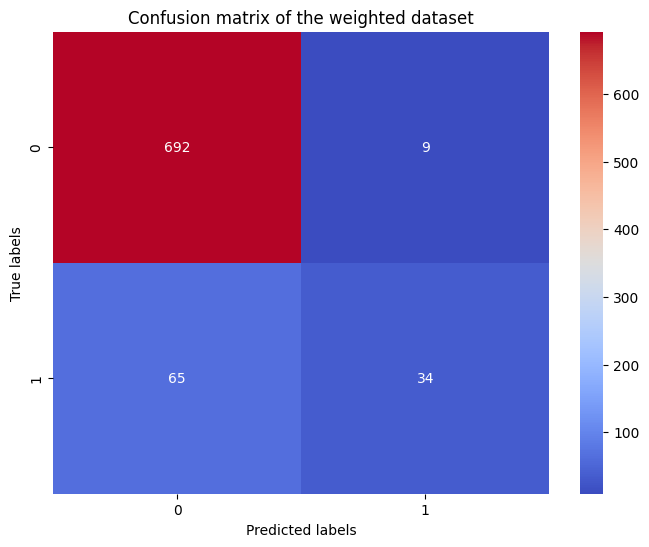

In [ ]:
# Weighted logistic regression

weights = {0: 1, 1: 1} # 

log_reg_weighted = LogisticRegression(class_weight=weights, random_state=30, max_iter=10000, solver = 'saga',  penalty='l1')
log_reg_weighted.fit(X_train, y_train)

# Check the performance of the model

print(f'Accuracy on validation set by weighted logreg \n { accuracy_score(y_val, log_reg_weighted.predict(X_val)):.3f} \n')

plot_confusion_matrix(y_val, log_reg_weighted.predict(X_val), 'Confusion matrix of the weighted dataset')

### Boosting

Accuracy on validation set by boosting 
 0.959 



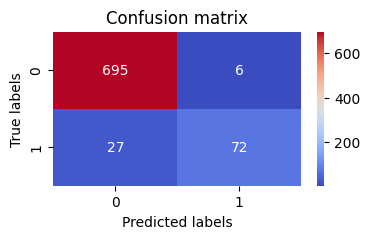

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier()
#boosting.fit(X_train_us, y_train_us)
boosting.fit(X_train, y_train)

print(f'Accuracy on validation set by boosting \n { accuracy_score(y_val, boosting.predict(X_val)):.3f} \n')

plot_confusion_matrix(y_val, boosting.predict(X_val), 'Confusion matrix')

In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 300, 500],
    'max_depth': [3, 5, 6, 7],
    'learning_rate': [0.01,  0.05, 0.1, 0.2],
    }

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train_clean_us, y_train_clean_us)


print(f'Best parameters: {grid_search.best_params_}')
best_boosting = grid_search.best_estimator_

print(f'Accuracy on validation set by best boosting \n { accuracy_score(y_val, best_boosting.predict(X_val)):.3f} \n')



Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
Accuracy on validation set by best boosting 
 0.941 



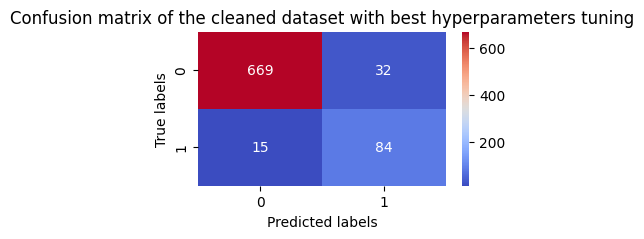

In [43]:
plot_confusion_matrix(y_val, best_boosting.predict(X_val), 'Confusion matrix of the cleaned dataset with best hyperparameters tuning')

### Support Vector Machines (SVM)

In [44]:
# Standard SVM

from sklearn import svm

SVM = svm.SVC()
SVM.fit(X_train_clean_us, y_train_clean_us)

print(f'Accuracy on validation set by SVM \n { accuracy_score(y_val, SVM.predict(X_val)):.3f} \n')

Accuracy on validation set by SVM 
 0.729 



In [46]:
#  Hyperparameter tuning

param_grid = {
    'C': [0.1, 1],# 10, 100],
    'gamma': [1, 0.1],# 0.01],
    'kernel': ['rbf', 'poly'],# 'sigmoid'] # Kernel trick --> allows to separate the data in a higher dimension space instead of only linearly
    }                                      # rbf --> radial basis function, poly --> polynomial, sigmoid --> sigmoid function

grid_search = GridSearchCV(svm.SVC(), param_grid, cv=3, n_jobs=-1)

grid_search.fit(X_train_clean_us, y_train_clean_us)

print(f'Best parameters: {grid_search.best_params_}')
best_grid_svm = grid_search.best_estimator_

print(f'Accuracy on validation set by best SVM \n { accuracy_score(y_val, best_grid_svm.predict(X_val)):.3f} \n')
plot_confusion_matrix(y_val, best_grid_svm.predict(X_val), 'Confusion matrix of the cleaned dataset with best hyperparameters tuning')

KeyboardInterrupt: 

In [ ]:
# K-fold cross validation to evaluate the model performance with the previous tuned hyperparameters

from sklearn.model_selection import cross_val_score

X_cross = np.vstack((X_val, X_train_clean_us))
y_cross = np.hstack((y_val, y_train_clean_us))

scores = cross_val_score(best_grid_svm, X_cross, y_cross, cv=5, scoring='accuracy') # retrain the model on each fold

print(f'Mean cross-validation score: {scores.mean():.3f}')


Mean cross-validation score: 0.976


### Decision Trees

Accuracy on validation set by Decision Tree 
 0.925 



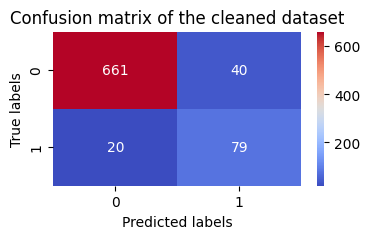

In [47]:
# Standard decision trees

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_clean_us, y_train_clean_us)

print(f'Accuracy on validation set by Decision Tree \n { accuracy_score(y_val, tree.predict(X_val)):.3f} \n')
plot_confusion_matrix(y_val, tree.predict(X_val), 'Confusion matrix of the cleaned dataset')

In [48]:
# Decision tree boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=30, learning_rate=0.1) # n_estimators --> number of trees
ada.fit(X_train_clean_us, y_train_clean_us)

grad = GradientBoostingClassifier(n_estimators=100, random_state=30, learning_rate=0.1)
grad.fit(X_train_clean_us, y_train_clean_us)

print(f'Accuracy on validation set by AdaBoost \n { accuracy_score(y_val, ada.predict(X_val)):.3f} \n')
print(f'Accuracy on validation set by GradientBoosting \n { accuracy_score(y_val, grad.predict(X_val)):.3f} \n')

Accuracy on validation set by AdaBoost 
 0.799 

Accuracy on validation set by GradientBoosting 
 0.912 



In [49]:
# Bagging decision trees

from sklearn.ensemble import BaggingClassifier

bagg = BaggingClassifier(n_estimators=100, random_state=30)
bagg.fit(X_train_clean_us, y_train_clean_us)

print(f'Accuracy on validation set by Bagging \n { accuracy_score(y_val, bagg.predict(X_val)):.3f} \n')

Accuracy on validation set by Bagging 
 0.943 



In [ ]:
# Bagging with pruning

bagg_prune = BaggingClassifier(DecisionTreeClassifier(min_samples_split=10), n_estimators=100, random_state=30) # min_samples_split --> minimum number of samples required to split an internal node
bagg_prune.fit(X_train_clean_us, y_train_clean_us)

print(f'Accuracy on validation set by Bagging with pruning \n { accuracy_score(y_val, bagg_prune.predict(X_val)):.3f} \n')

Accuracy on validation set by Bagging with pruning 
 0.939 



### Random Forest

Accuracy on validation set by Random Forest 
 0.936 



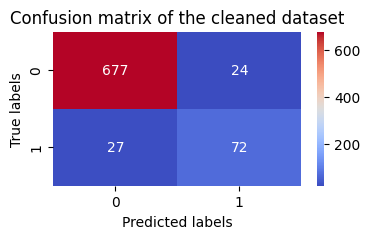

In [51]:
# Standard Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=30)
forest.fit(X_train_clean_us, y_train_clean_us)

print(f'Accuracy on validation set by Random Forest \n { accuracy_score(y_val, forest.predict(X_val)):.3f} \n')
plot_confusion_matrix(y_val, forest.predict(X_val), 'Confusion matrix of the cleaned dataset')

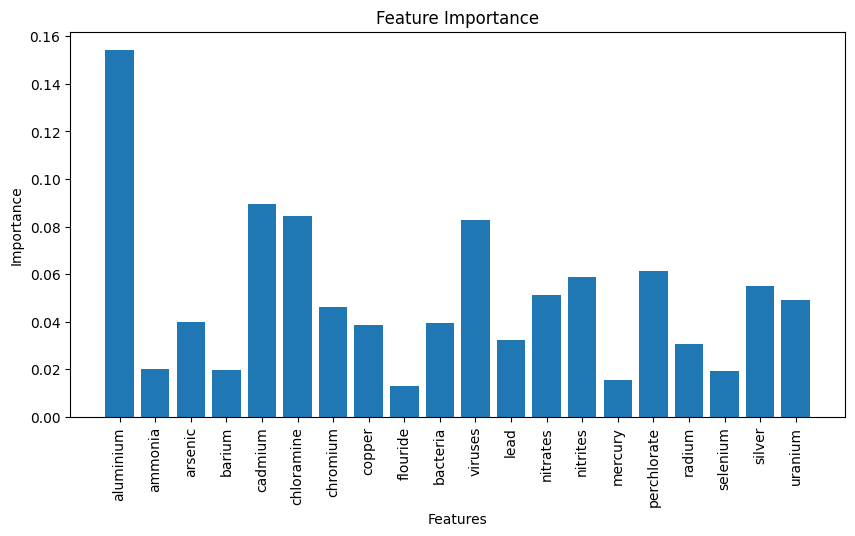

In [ ]:
# Display the feature importance

importances = forest.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(X.columns, importances)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()